# 🎮 Video Game Sales EDA Project

This project is part of my internship **Task-02** at `#ProdigyInfoTech`. The goal is to perform data cleaning and exploratory data analysis (EDA) on a real-world dataset. I selected the **Video Game Sales dataset** from Kaggle, which contains information about thousands of games, their platforms, genres, sales across regions, and review scores.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

In [3]:
# Load the dataset
df = pd.read_csv('/Users/gnanreddybobba/Desktop/Video_Games_Sales_as_at_22_Dec_2016.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


## 🧹 Data Cleaning

In [4]:
# Replace 'tbd' in User_Score with NaN and convert to float
df['User_Score'] = df['User_Score'].replace('tbd', None)
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')

# Drop rows with missing critical info
df = df.dropna(subset=['Name', 'Year_of_Release', 'Genre'])

# Convert Year to integer
df['Year_of_Release'] = df['Year_of_Release'].astype(int)

# Fill missing categorical values
df['Publisher'] = df['Publisher'].fillna('Unknown')
df['Rating'] = df['Rating'].fillna('Unknown')

# Drop less-used columns (optional)
df.drop(columns=['Developer', 'Critic_Count', 'User_Count'], inplace=True)

# Final check
df.isnull().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8465
User_Score         8985
Rating                0
dtype: int64

## 📊 Exploratory Data Analysis (EDA)

### 🎯 Top 10 Genres by Global Sales

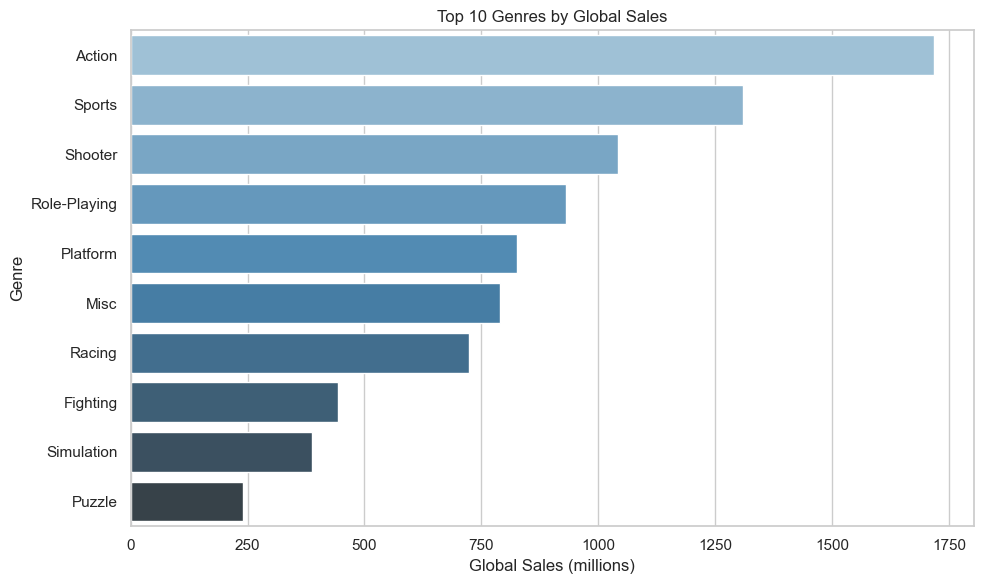

In [5]:
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=genre_sales.values, y=genre_sales.index, palette='Blues_d')
plt.title('Top 10 Genres by Global Sales')
plt.xlabel('Global Sales (millions)')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

### 🕹️ Top 10 Platforms by Number of Games Released

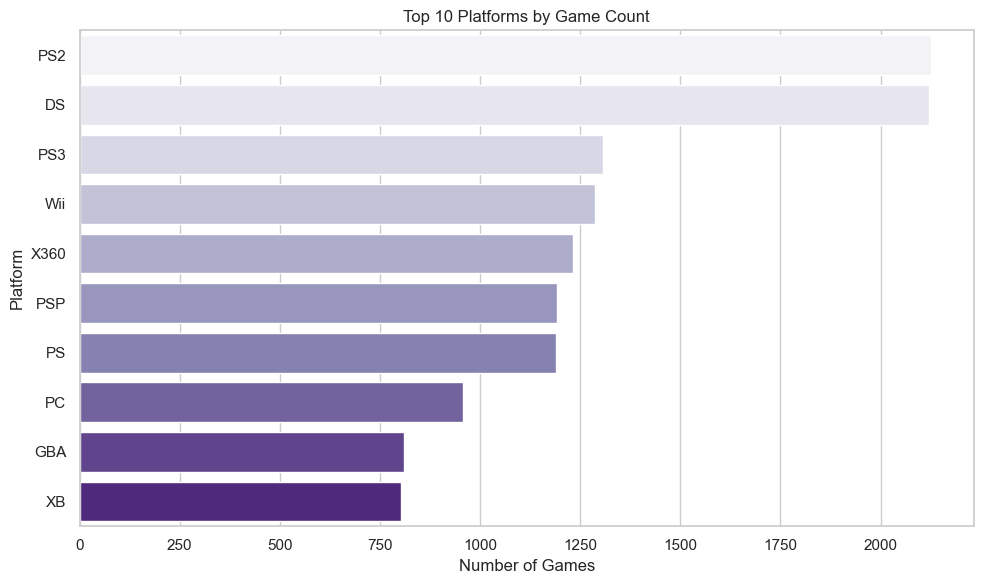

In [6]:
platform_count = df['Platform'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=platform_count.values, y=platform_count.index, palette='Purples')
plt.title('Top 10 Platforms by Game Count')
plt.xlabel('Number of Games')
plt.ylabel('Platform')
plt.tight_layout()
plt.show()

### 🗓️ Games Released Per Year

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


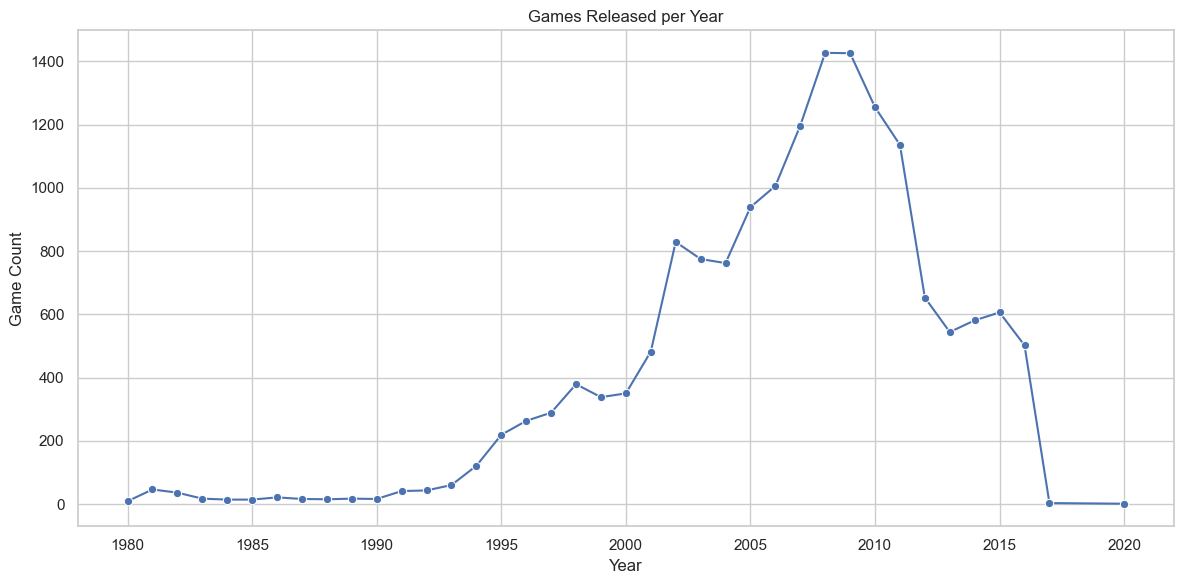

In [7]:
year_trend = df['Year_of_Release'].value_counts().sort_index()

plt.figure(figsize=(12,6))
sns.lineplot(x=year_trend.index, y=year_trend.values, marker='o')
plt.title('Games Released per Year')
plt.xlabel('Year')
plt.ylabel('Game Count')
plt.tight_layout()
plt.show()

### 🌍 Total Sales by Region

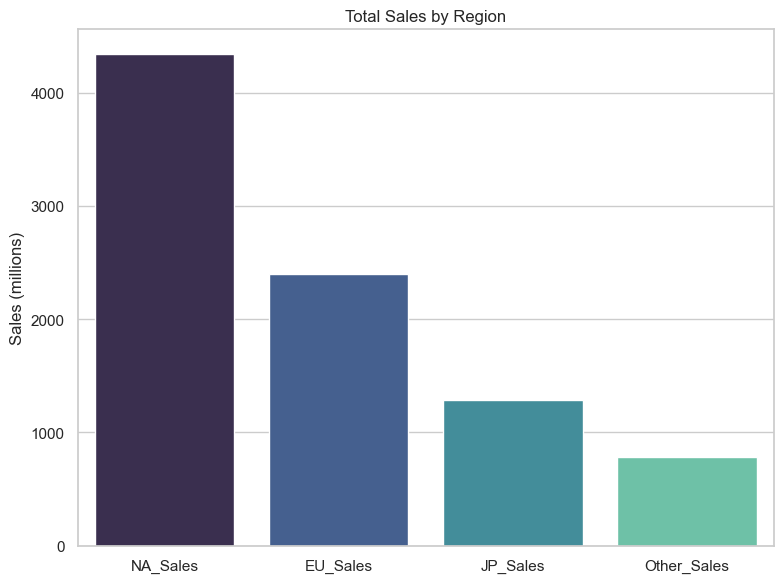

In [8]:
region_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=region_sales.index, y=region_sales.values, palette='mako')
plt.title('Total Sales by Region')
plt.ylabel('Sales (millions)')
plt.tight_layout()
plt.show()

### 🧪 Critic Score vs Global Sales

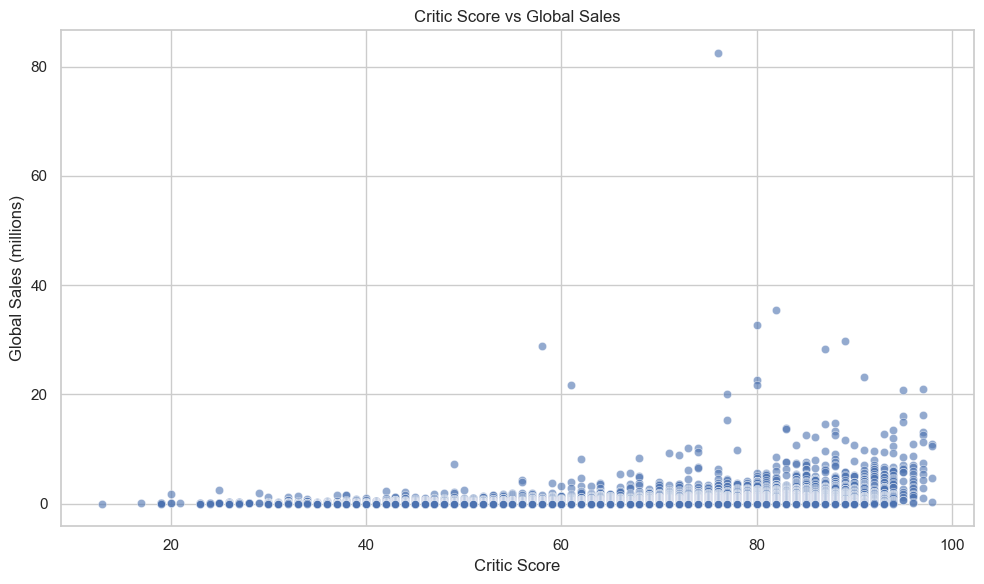

In [9]:
critic_df = df.dropna(subset=['Critic_Score'])

plt.figure(figsize=(10,6))
sns.scatterplot(data=critic_df, x='Critic_Score', y='Global_Sales', alpha=0.6)
plt.title('Critic Score vs Global Sales')
plt.xlabel('Critic Score')
plt.ylabel('Global Sales (millions)')
plt.tight_layout()
plt.show()

## 🧠 Key Insights
- 🎮 **Action, Sports, and Shooter** games dominate global sales.
- 🎮 **PS2 and DS** have the highest number of games released.
- 📈 Game releases peaked around 2008–2009 and declined after 2011.
- 🌎 **North America** is the largest market for video game sales.
- 🧪 Games with **higher critic scores** tend to have higher global sales, though the correlation isn't perfectly linear.
